# Exercise 5: Final project dataset exploratory analysis

## Dataset Introduction
[Visa Application by Nationality in Japan](https://www.kaggle.com/datasets/yutodennou/visa-issuance-by-nationality-and-region-in-japan/data) is a multivariate dataset compiled by Waticson on Kaggle. It primarily contains information on numbers of visas issued as well as purpose of visit per country from 2006 to 2017. This dataset is licensed using the [Database Contents License (DbCL) v1.0, from Open Data Commons.](https://opendatacommons.org/licenses/dbcl/1-0/), which explicitly permits reuse.

In [82]:
# Load the data
import pandas as pd

visas = pd.read_csv("visa_number_in_japan.csv")
visas.head(10)

,Year,Regional code,Country,Number of issued,Number of issued_numerical,Travel certificate,Diplomacy,Public use,Passing,Short -term stay,...,identification,Specific_housework employee,Specified_short term,Specific_profit representative staff,Specific_working holiday,Specified_Amasport,"Specific_Japanese spouse, etc.","Specific_Permanent resident's spouse, etc.",Specified_Distingant,Specific_Others
0,2017,0,total,5869012,741415,389.0,4862.0,16402.0,8518,5392838,...,53552,122.0,NaN,49.0,15521.0,77.0,10227,2181.0,16945,8431.0
1,2017,40,Afghanistan,1005,46,0.0,14.0,112.0,0,224,...,13,0.0,NaN,0.0,0.0,0.0,2,3.0,8,0.0
2,2017,80,Albania,252,7,0.0,0.0,2.0,1,200,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0
3,2017,120,Algeria,899,19,0.0,8.0,11.0,3,813,...,2,0.0,NaN,0.0,0.0,0.0,1,1.0,0,0.0
4,2017,200,Andra,5,0,0.0,0.0,0.0,0,0,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0
5,2017,240,Angola,111,12,75.0,9.0,7.0,0,67,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0
6,2017,280,Antigua Berbuda,41,8,0.0,1.0,0.0,0,28,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0
7,2017,310,Azerbaijan,619,8,0.0,31.0,20.0,0,505,...,2,0.0,NaN,0.0,0.0,0.0,1,1.0,0,0.0
8,2017,320,Argentina,450,0,0.0,0.0,1.0,0,0,...,93,0.0,NaN,0.0,45.0,0.0,19,2.0,25,2.0
9,2017,360,Australia,3887,281,0.0,54.0,220.0,0,5,...,1341,0.0,NaN,0.0,1182.0,21.0,114,4.0,2,18.0


In [83]:
### Clean the data
# Replace NAs with zeros
visas = visas.fillna(0)

# Correct spelling of countries
visas = visas.replace("Andra", "Andorra")
visas = visas.replace("united states of america", "USA")

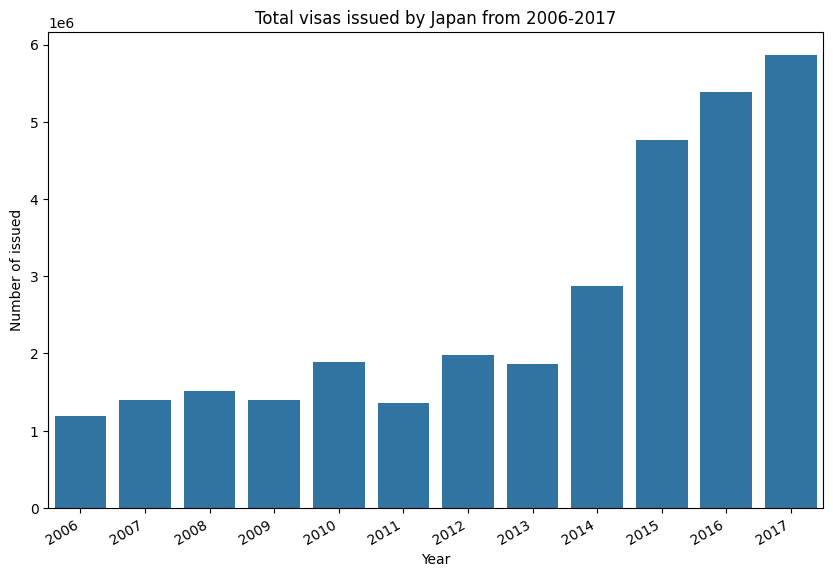

In [84]:
### Exploratory plots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Total visas issued from 2006-2017
# Pull country totals
total = visas[visas["Country"] == "total"]
total.head(10)

# Delete non-total rows
visas = visas[visas["Country"] != "total"].reset_index(drop=True)
visas.head(10)

fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x=total["Year"], y=total["Number of issued"])
fig.autofmt_xdate()
plt.title("Total visas issued by Japan from 2006-2017")
plt.show()

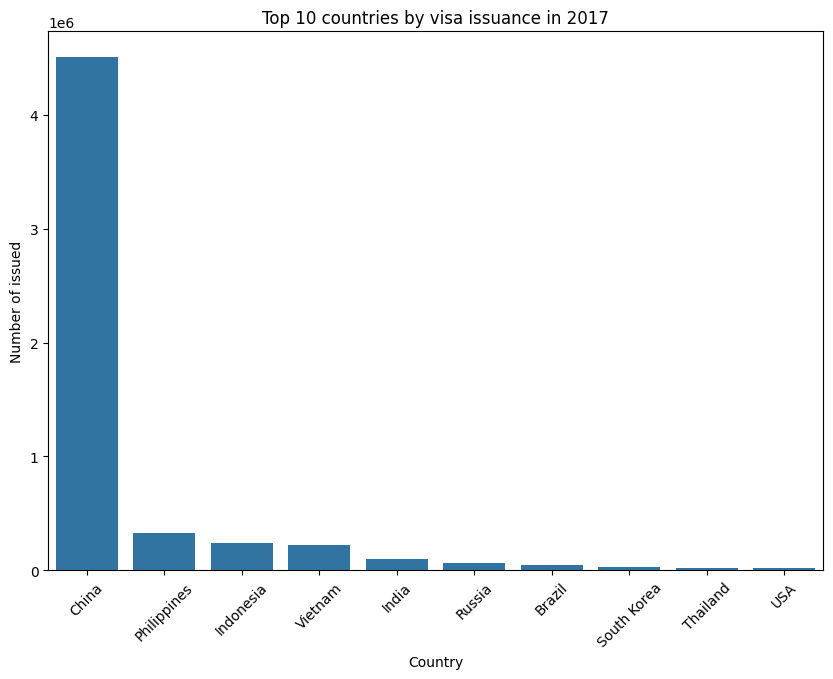

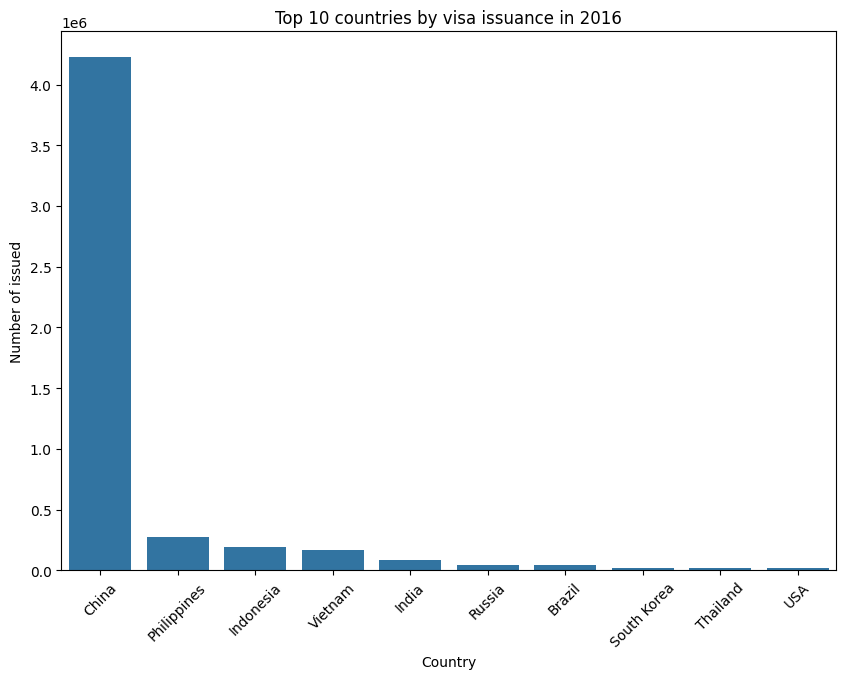

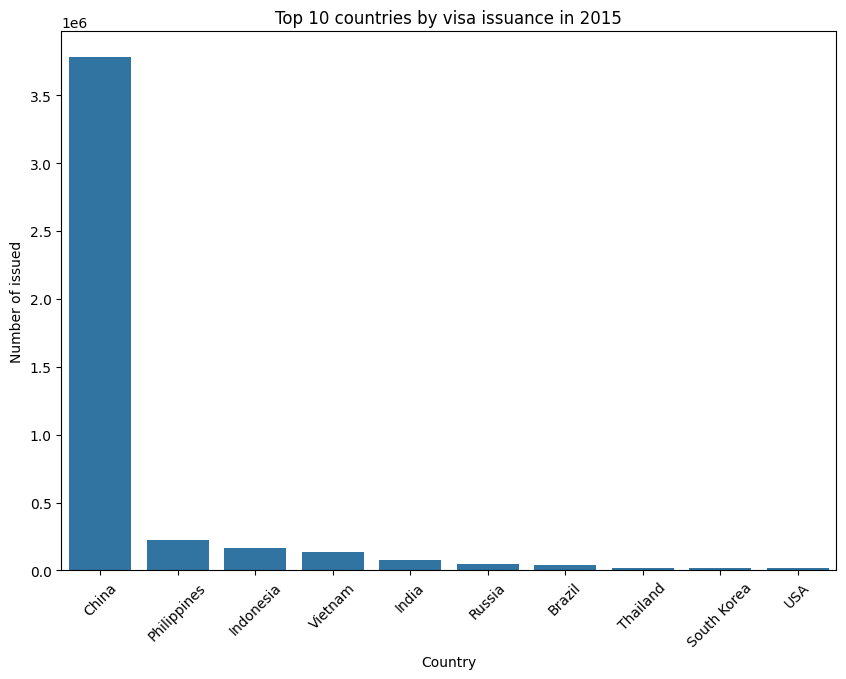

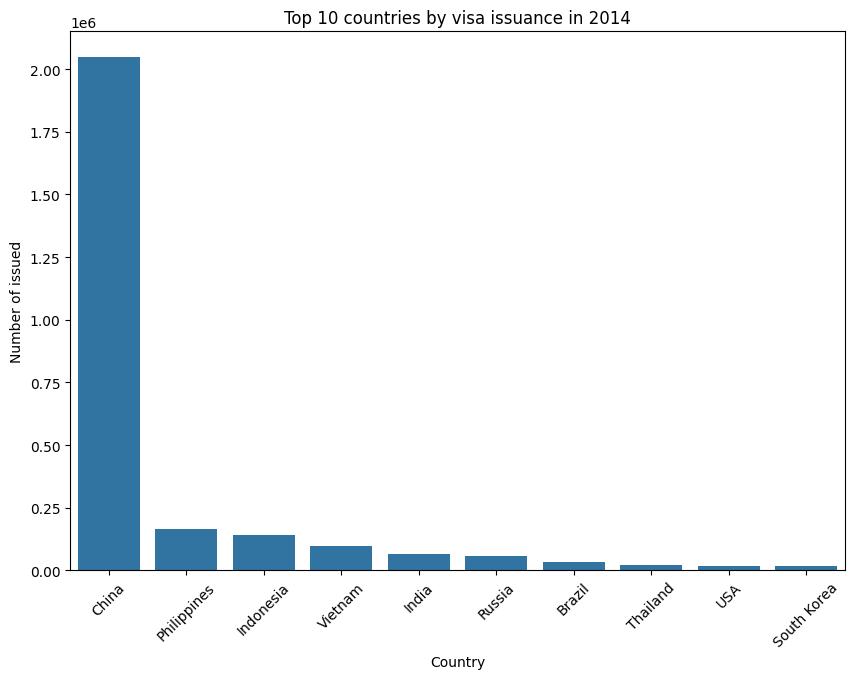

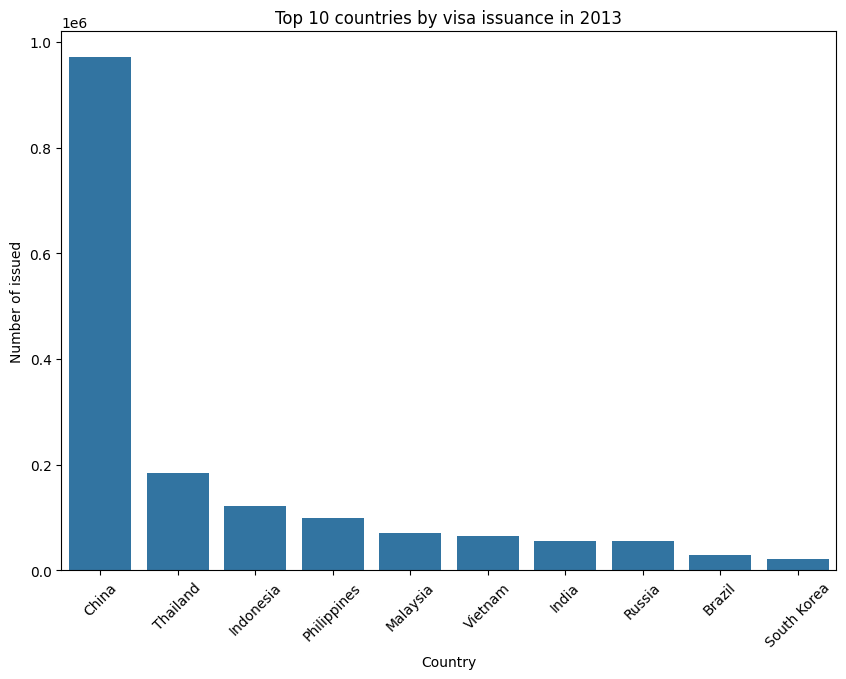

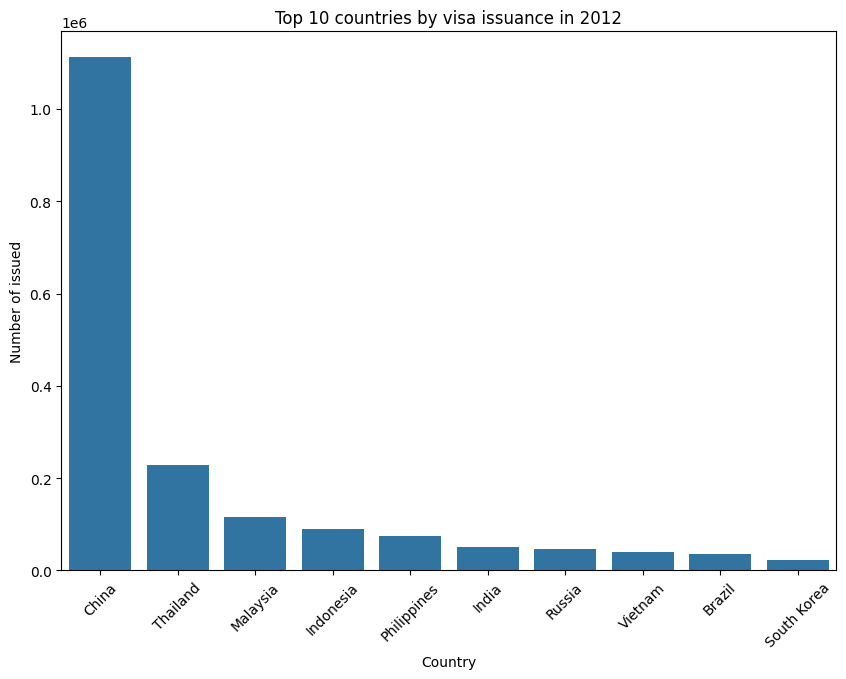

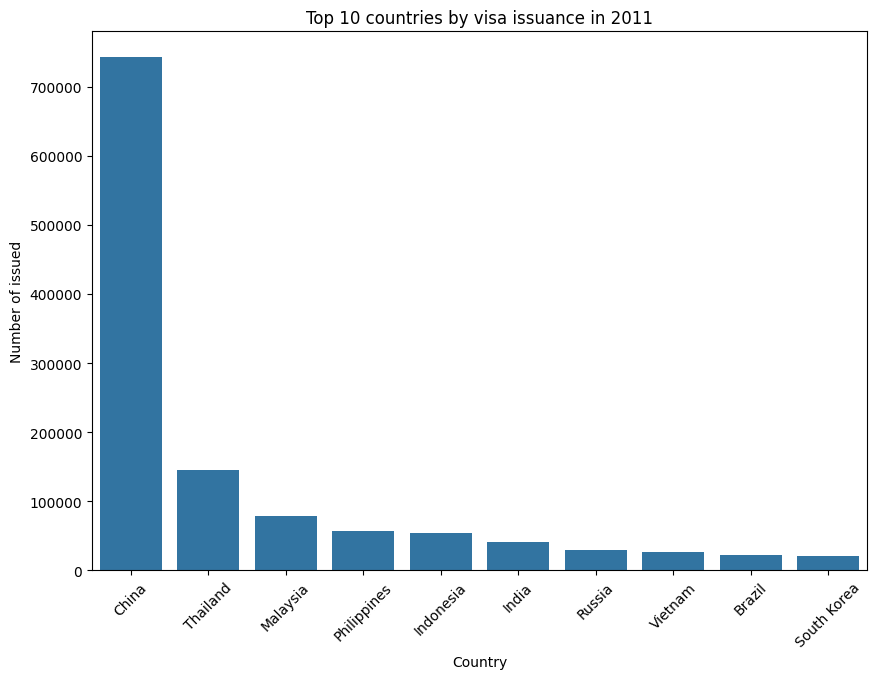

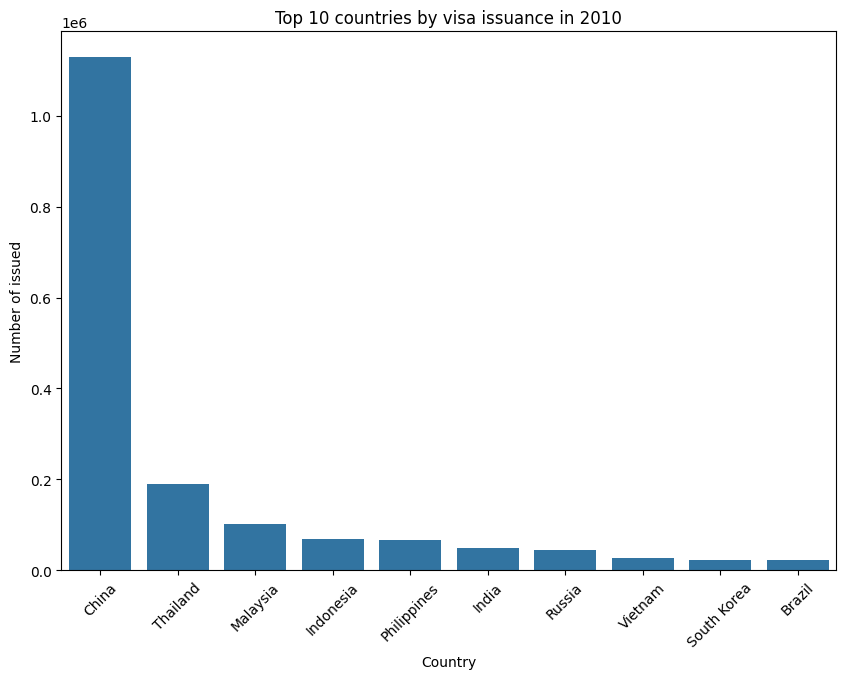

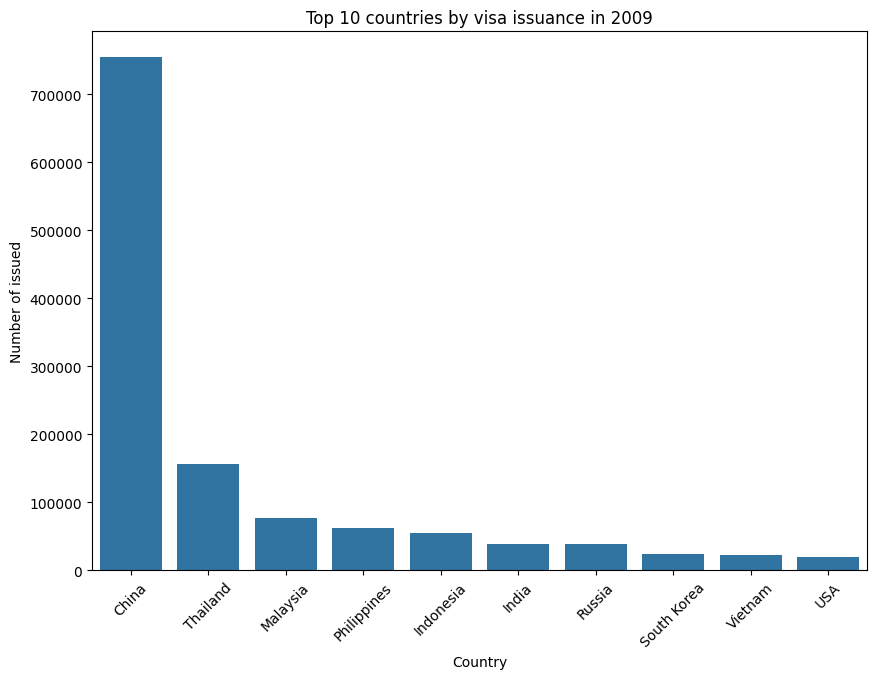

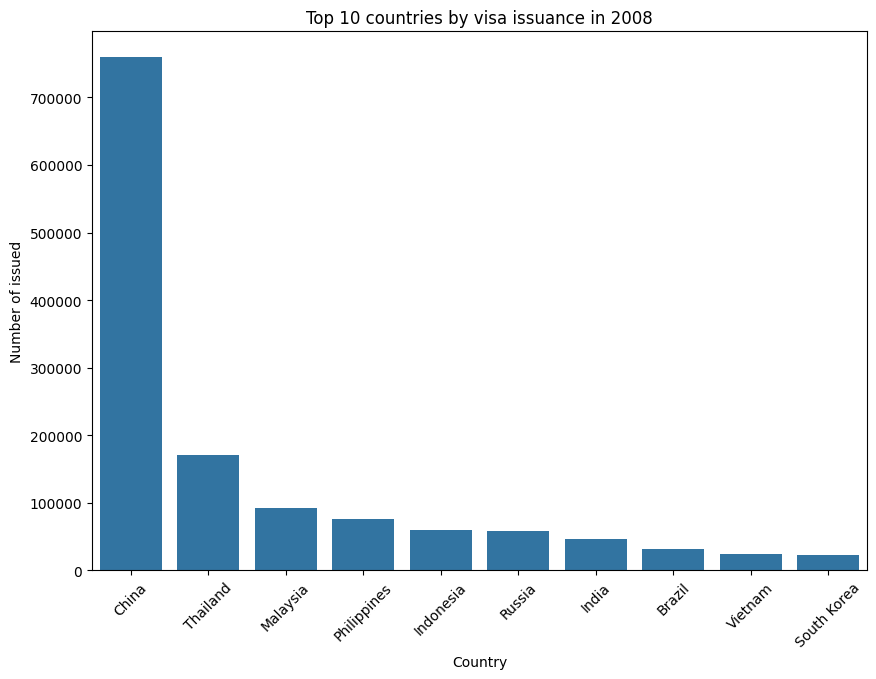

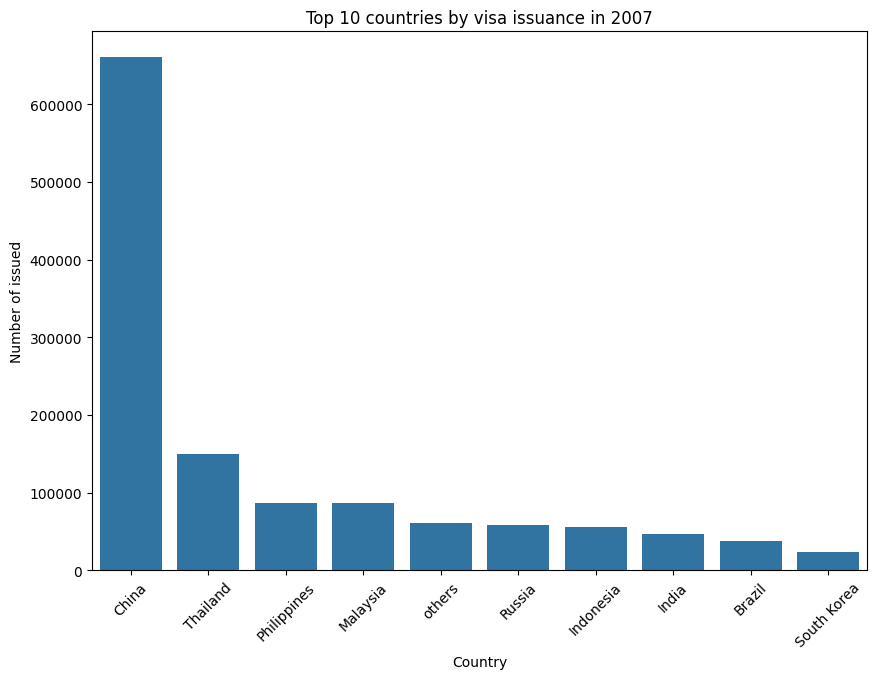

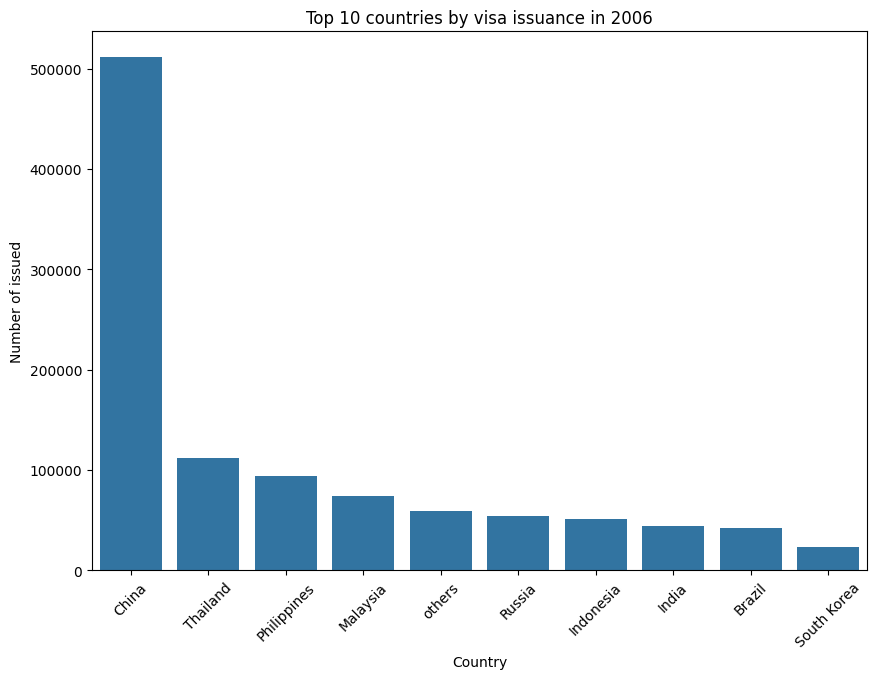

In [85]:
## Top 10 nationalities of visa issuance from 2006-2017
for year in visas["Year"].unique():
    top = visas[visas["Year"] == year].sort_values(by="Number of issued", ascending=False).head(10)
    fig = plt.figure(figsize = (10,7))
    ax = sns.barplot(x=top["Country"], y=top["Number of issued"])
    plt.title(f"Top 10 countries by visa issuance in {year}")
    plt.xticks(rotation=45)
    plt.show()

**Commentary:** The number of visas issued by Japan steadily increased from 2006-2017, and China has remained the country sending the most visa applicants throughout.